# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What we're going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/ algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

## An end-to-end Scikit-Learn workflow

In [2]:
# 1.Get the data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("data\heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X (feature matrix)
X = heart_disease.drop("target",axis=1)

# Create y (labels)
y = heart_disease["target"]

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model to the fata
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [8]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2


In [9]:
# make a prediction
# y_label = clf.predict(np.array([0,2,3,4]))

In [10]:
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [11]:
y_test

96     1
113    1
206    0
251    0
11     1
      ..
58     1
142    1
215    0
87     1
276    0
Name: target, Length: 61, dtype: int64

In [12]:
# 4. Evaluate the model on the trainig data and test data
clf.score(X_train, y_train)

1.0

In [13]:
clf.score(X_test,y_test)

0.819672131147541

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [15]:
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 7, 25]], dtype=int64)

In [16]:
accuracy_score(y_test, y_preds)

0.819672131147541

In [17]:
# 5. Improve a model
# Try different amount of n_estimators

np.random.seed(42)
for i in range(10, 100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators = i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test,y_test)*100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 81.97%

Trying model with 20 estimators...
Model accuracy on test set: 81.97%

Trying model with 30 estimators...
Model accuracy on test set: 83.61%

Trying model with 40 estimators...
Model accuracy on test set: 78.69%

Trying model with 50 estimators...
Model accuracy on test set: 80.33%

Trying model with 60 estimators...
Model accuracy on test set: 80.33%

Trying model with 70 estimators...
Model accuracy on test set: 81.97%

Trying model with 80 estimators...
Model accuracy on test set: 81.97%

Trying model with 90 estimators...
Model accuracy on test set: 85.25%



In [18]:
# 6. Save a model and load it
import pickle

pickle.dump(clf,open("random_forest_model_1.pkl","wb"))

In [19]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score (X_test, y_test)

0.8524590163934426

### 1.1 Make sure it's all numerical

In [20]:

car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [21]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [22]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [23]:
# Split into X/y
X = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [24]:
# Build machine learning model
# RandomForestRegressor is the same as a classifier random forest, but this time it can predit a number.
# We're trying to predict the price of the car, given some attributes about it.
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# won't work
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [25]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

# the version of our X data
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [26]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [27]:
# Another way to do it with pd.dummies...
dummies = pd.get_dummies(car_sales[["Make","Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [28]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train,y_test = train_test_split(transformed_X,
                                                  y,
                                                  test_size=0.2)
model.fit(X_train,y_train)

RandomForestRegressor()

In [29]:
model.score(X_test,y_test)

0.3235867221569877

### 1.2 What if there missing values?

1. Fill them with some value (also klnown as imputatuion).
2. Remove the samples with missing data altogether.

In [30]:
# Import car dales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [31]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [32]:
# Create X & y
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [33]:
# Let's try and convert our data to numbers

# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

# the version of our X data
transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

### Option 1: Fill missing data with Pandas

In [34]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing",inplace = True)

# Fill the color column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Price" column
car_sales_missing["Price"].fillna(car_sales_missing["Price"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [35]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [36]:
# Let's try and convert our data to numbers

# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

# the version of our X data


# <1000x16 sparse matrix of type '<class 'numpy.float64'>'
# with 4000 stored elements in Compressed Sparse Row format>
# transformed_X = transformer.fit_transform(X)

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Oprion 2: Fill missing values with Scikit-learn

In [37]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [38]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [39]:
# Drop the rows with no labels
car_sales_missing.dropna(subset = ["Price"], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [40]:
# Split into X & y
X = car_sales_missing.drop("Price",axis = 1)
y = car_sales_missing["Price"]

In [41]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value='missing')
door_imputer = SimpleImputer(strategy="constant", fill_value = 4)
num_imputer = SimpleImputer(strategy="mean")

# Define colums
cat_features = ["Make","Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [42]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [43]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [43]:
# Let's try and convert our data to numbers

# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

# the version of our X data


# <1000x16 sparse matrix of type '<class 'numpy.float64'>'
# with 4000 stored elements in Compressed Sparse Row format>
# transformed_X = transformer.fit_transform(X)

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [44]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (transformed_X,
                                                   y,
                                                   test_size = 0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

In [45]:
# The difference is because we've dropped the samples that don't have labels
len(car_sales_filled), len(car_sales)

(950, 1000)

## Choosing the right estimator/algorithm for your problem

Some things to note:
* Sklearn refers to machine learning models, algorithms as estimators.
* Classification problem - predicting a category (heart diseaese or not)
    * Sometimes you'll see 'clf' (short for classifier) used as a classification estimator.
* Regression problem - predicting a number (selling price of a car)

If you're working on a machine learning problem and looking to use Sklearn and not sure what model you should use, refer to the swklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem

Let's use the California Housing dataset.

In [32]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [33]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [72]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [70]:
housing_df = housing_df.drop("MedhouseVal",axis=1)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [73]:
# Import algorithm
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data

X = housing_df.drop("target", axis = 1)
y = housing_df["target"] # median house price in $100,000s

# Split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.5758549611440128

What if `Ridge` didn't work or the score didn't fit our needs?

Well, we could always try a different model...

How about we try ensemble model (an ensemble is combination of smalller models to try and make better predictions than just a single model)?

Sklearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [74]:
# import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data

X = housing_df.drop("target", axis = 1)
y = housing_df["target"] # median house price in $100,000s

# Split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.8065734772187598

## 2.2 Picking a machine learning model for a classification problem

In [10]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Consulting the map and it says to try `LinearSVC`

In [80]:
# import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis= 1)
y = heart_disease["target"]

# Split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instanstiate LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

0.8688524590163934

In [84]:
# import the RFC
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis= 1)
y = heart_disease["target"]

# Split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instanstiate RFC
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Evaluate the RFC
clf.score(X_test, y_test)

0.8524590163934426

In [82]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

Tidbit:

    1. If you have structured data, use ensemble methods
    2. If you have unstructured data, use deep leraning or transfer learning

## 3. Fit the model/algorithm on or data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for:
* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [85]:
# import the RFC
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis= 1)
y = heart_disease["target"]

# Split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instanstiate RFC
clf = RandomForestClassifier()

# Fit the model to the data (trainif the mavhine learning mosel)
# When we pass X and y to fit , it will cause the model to go through all of the examples in X,
# the training data in our case, and see what their corresponding Y label is and try to figure out the patterns
# that lead to the diffferent combinations of numbers
clf.fit(X_train, y_train)

# Evaluate the RFC (use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

In [86]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

2 ways to preditions:

1. `predict()`
2. `predict_proba()`

In [88]:
# Use a trained model to make predictions
# clf.predict(np.array([1,7,8,3,4])) # this doesn't work...

# ValueError: Expected 2D array, got 1D array instead:
# array=[1. 7. 8. 3. 4.].
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [89]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [90]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [92]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [93]:
# Compare predictions to truth labels to evaluate the model

y_preds = clf.predict(X_test)

# = same as clf.score(X_test, y_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

MAke predictions with `predict_proba()`

In [97]:
# predict_proba() returns probabilities of a classicivation
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [98]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [ ]:
# [0.49, 0.51] - coin toss 

In [99]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [100]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
# use PP to make sure our model is confident

`predict()` can also be used for regression models.

In [101]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [102]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model=RandomForestRegressor() # create model instance
model.fit(X_train, y_train) # fit the model to the data
y_preds = model.predict(X_test) # make predicitons

In [103]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [104]:
np.array([y_test[:10]])

array([[0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
        1.575  , 3.4    , 4.466  ]])

In [105]:
len(y_preds), len(y_test)

(4128, 4128)

In [106]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

In [107]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn model/estimators:

1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions
   
https://scikit-learn.org/stable/modules/model_evaluation.html   

### 4.1 Evaluating a model with `score` method

In [118]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis =1 )
y = heart_disease["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=2)

clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2)

In [119]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)

0.9090909090909091

In [120]:
clf.score(X_test, y_test)

0.6885245901639344

Let's use the `score()` on our regression probelm...

In [135]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target', axis =1 )
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestRegressor()

clf.fit(X_train, y_train)

RandomForestRegressor()

In [136]:
# The default score() evaluation metric is r_squared for regression algorithms
# The highest value for the .score() method is 1.0, the lowest is 0.0
model.score(X_test, y_test)

0.8065734772187598

### 4.2 Evaluating a model using the `scoring` parameter

In [137]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier


np.random.seed(42)

X = heart_disease.drop('target', axis =1 )
y = heart_disease["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=2)

clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2)

In [138]:
clf.score(X_test,y_test)

0.6885245901639344

In [143]:
cross_val_score(clf, X, y, cv = 5)

array([0.59016393, 0.72131148, 0.6557377 , 0.7       , 0.7       ])

In [144]:
cross_val_score(clf, X, y, cv = 10)

array([0.70967742, 0.58064516, 0.67741935, 0.8       , 0.8       ,
       0.63333333, 0.63333333, 0.76666667, 0.6       , 0.83333333])

In [148]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv = 5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.6885245901639344, 0.6963934426229508)

In [150]:
# Default scoring parameter of classifier = mean accuracy
# clf.score()

0.6885245901639344

In [146]:
# Scoring parameter set to none y default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.72131148, 0.72131148, 0.59016393, 0.7       , 0.65      ])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [183]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis =1 )
y = heart_disease["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv = 5)

In [184]:
np.mean(cross_val_score)

0.8215300546448088

In [185]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.15%


**Area under the receiver operating charecteristic curve (aUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) vs. a models false positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [211]:
# Create X_test... etc
np.random.seed(42)
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [212]:
from sklearn.metrics import roc_curve

clf = RandomForestClassifier()



# fit the classifier
clf.fit(X_train,y_train)

clf.score(X_test, y_test)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.89, 0.11],
        [0.49, 0.51],
        [0.43, 0.57],
        [0.84, 0.16],
        [0.18, 0.82],
        [0.14, 0.86],
        [0.36, 0.64],
        [0.95, 0.05],
        [0.99, 0.01],
        [0.47, 0.53]]),
 61)

In [213]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [214]:
# Calculate fpr, tpr and thresholds

fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)


# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

In [215]:
tpr

array([0.     , 0.03125, 0.09375, 0.375  , 0.4375 , 0.4375 , 0.46875,
       0.59375, 0.6875 , 0.6875 , 0.71875, 0.75   , 0.75   , 0.875  ,
       0.875  , 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875,
       0.96875, 1.     , 1.     , 1.     ])

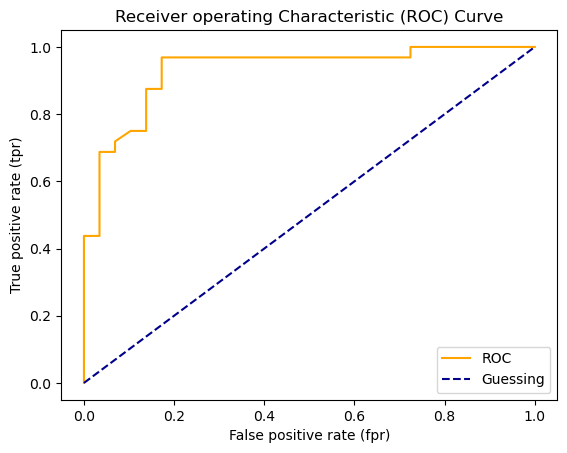

In [216]:
# Create a function for a plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    '''
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    '''
    
    # Plot roc curve
    plt.plot(fpr, tpr, color = "orange", label = "ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color = "darkblue", linestyle ="--", label = "Guessing")
    
    # customize the plot
    plt.xlabel ("False positive rate (fpr)")
    plt.ylabel ("True positive rate (tpr)")
    plt.title ("Receiver operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)    

In [217]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9304956896551724

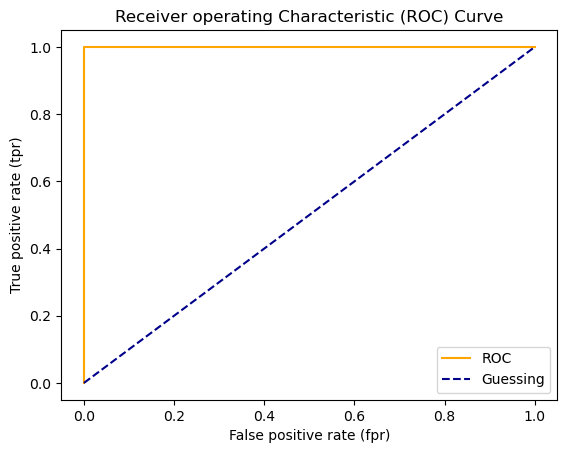

In [218]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

In [219]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getring confused.

In [224]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [226]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
           y_preds,
           rownames = ["Actual Labels"],
           colnames = ["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


In [230]:
24 + 5 + 4 + 28

61

In [229]:
len(y_preds), len(X_test)

(61, 61)

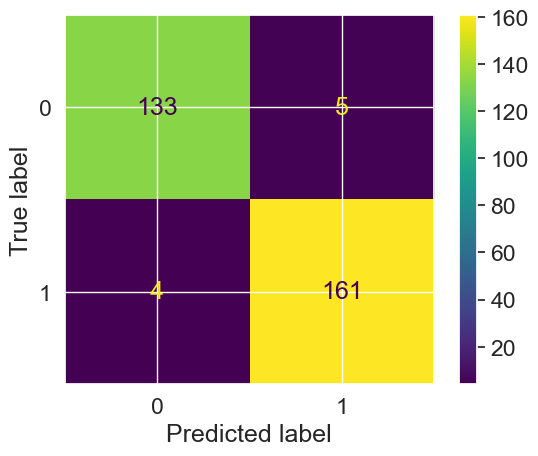

In [234]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

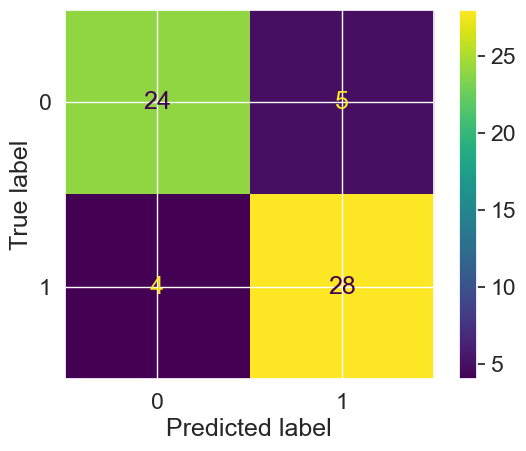

In [237]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test,
                                      y_pred = y_preds);

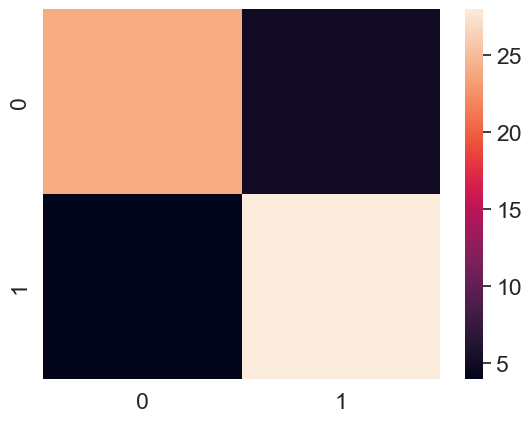

In [233]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale = 1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

### Classification Report

In [238]:
from sklearn.metrics import classification_report

## The numbers are similar because we have balanced classes

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [243]:
# Where precision and recall become valuable

disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict = True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation:

the ones we're going to cover are:
1. R^2 or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [244]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_test,y_test)

RandomForestRegressor()

In [245]:
model.score(X_test, y_test)

0.9652739672763454

In [246]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [247]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [248]:
y_test.mean()

2.0550030959302323

In [249]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [250]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [251]:
r2_score(y_true = y_test,
        y_pred = y_test_mean)

0.0

In [252]:
r2_score(y_true = y_test,
        y_pred = y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [254]:
# MAE
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.1429742775193802

In [255]:
y_preds

array([0.49609  , 0.59792  , 4.6706571, ..., 4.9416292, 0.72404  ,
       1.58368  ])

In [256]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [259]:
df = pd.DataFrame(data = {"actual values":y_test,
                         "predicted values":y_preds})
df["differences"] = df['predicted values'] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.496090,0.019090
3024,0.45800,0.597920,0.139920
15663,5.00001,4.670657,-0.329353
20484,2.18600,2.280800,0.094800
9814,2.78000,2.635240,-0.144760
13311,1.58700,1.664170,0.077170
7113,1.98200,2.088630,0.106630
7668,1.57500,1.587970,0.012970
18246,3.40000,2.937330,-0.462670
5723,4.46600,4.624403,0.158403


In [261]:
df["differences"].mean()

0.006794283187984053

In [262]:
# MAE using formulas differences
np.abs(df['differences']).mean()

0.1429742775193802

**Mean squared error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values.

In [265]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.04550530505976422

In [266]:
df['squared differences'] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared differences
20046,0.47700,0.496090,0.019090,0.000364
3024,0.45800,0.597920,0.139920,0.019578
15663,5.00001,4.670657,-0.329353,0.108473
20484,2.18600,2.280800,0.094800,0.008987
9814,2.78000,2.635240,-0.144760,0.020955


In [268]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

0.04550530505976422

In [282]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16

In [283]:
df_large_error.head()

,actual values,predicted values,differences,squared differences
20046,0.47700,0.496090,0.019090,0.000364
3024,0.45800,0.597920,0.139920,0.019578
15663,5.00001,4.670657,-0.329353,0.108473
20484,2.18600,2.280800,0.094800,0.008987
9814,2.78000,2.635240,-0.144760,0.020955


In [284]:
# Calculate MSE with error
df_large_error["squared differences"].mean()

0.04550530505976422

In [285]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared differences
20046,0.47700,0.496090,0.019090,0.000364
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.413360,-0.219640,0.048242
16623,2.66800,2.175550,-0.492450,0.242507
18086,5.00001,4.941629,-0.058381,0.003408
2144,0.72300,0.724040,0.001040,0.000001


In [286]:
# Calculate MSE with error
df_large_error["squared differences"].mean()

0.5241938848906152

### 4.2.3 Finally using the `scoring` parameter

In [291]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [292]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf,X,y, cv = 5, scoring=None) # if scoring=None, estimator's default scoring evaluation metric is used(accuracy for classification model)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [303]:
# Cross-validated accuarcy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}")

The cross-validated accuracy is: 82.48


In [295]:
# Precision
np.random.seed(42)


cv_precision = cross_val_score(clf, X, y, cv = 5, scoring = "precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [307]:
# Cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision):.2f}")

The cross-validated precision is: 0.83


In [301]:
# Recall
cv_recall = cross_val_score(clf, X, y, cv = 5, scoring = "recall")
cv_recall

array([0.90909091, 0.87878788, 0.81818182, 0.87878788, 0.87878788])

In [308]:
# Cross-validated recall
print(f"The cross-validated recall is: {np.mean(cv_recall):.2f}")

The cross-validated recall is: 0.87


Let's see the `scoring` parameter being fou using regression problem...

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

model = RandomForestRegressor()

In [316]:
np.random.seed(42)
cv_r2 = cross_val_score(model,X,y,cv=3, scoring=None)
np.mean(cv_r2)

0.6545458023124507

In [317]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [318]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv = 3, scoring = "neg_mean_squared_error")
np.mean(cv_mse)

-0.4626304189468596

In [319]:
cv_mse

array([-0.51816064, -0.33163551, -0.53809511])

In [320]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv = 3, scoring = "neg_mean_absolute_error")
np.mean(cv_mae)

-0.4820330437306202

In [321]:
cv_mae

array([-0.5173712 , -0.4219676 , -0.50676033])

In [322]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv = 5, scoring = "neg_mean_squared_error")
np.mean(cv_mse)

-0.4290450602466023

In [324]:
cv_mse

array([-0.52025655, -0.34561662, -0.37477288, -0.43921903, -0.46536023])

In [326]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv = 5, scoring = "neg_mean_absolute_error")
np.mean(cv_mae)

-0.46610986991279085

In [327]:
cv_mae

array([-0.54620534, -0.40941373, -0.43812676, -0.46369929, -0.47310423])

## 4.3 Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn machine learning model/estimator is to using the `sklearn.metrics` module - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target",axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

y_preds = clf.predict(X_test)

print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


In [89]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2)
model = RandomForestRegressor()

model.fit(X_train,y_train)

y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score:{r2_score(y_test,y_preds)}")
print(f"MAE:{mean_absolute_error(y_test,y_preds)}")
print(f"MSE:{mean_squared_error(y_test,y_preds)}")

NameError: name 'housing_df' is not defined

## 5. Improving a model

Fisrt predictions = baseline predictions.
First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs. Parameters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [44]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [45]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation and set

In [46]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:
* `max_depth`
* `max_features`
* `max_sample_leaf`
* `max_samples_split`
* `n_estimators`

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_true, y_preds):
    '''''
    Performs evaluation comparison on y_true labels vs. y_pred labels on a classification
    '''''
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy,2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [48]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac = 1)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data

X_train, y_train = X[:train_split], y[:train_split]

X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]

X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [49]:
len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [50]:
len(heart_disease_shuffled), 0.15*len(heart_disease_shuffled), train_split, valid_split

(303, 45.449999999999996, 212, 257)

In [51]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


In [52]:
clf_3 = RandomForestClassifier(n_estimators=100,
                              max_depth = 10)

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [53]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[10, 100, 200, 500, 1000, 1200],
       "max_depth": [None, 5, 10, 20, 30],
        "max_features" : ['auto','sqrt'],
       "min_samples_split":[2,4,6],
       "min_samples_leaf":[1,2,4]}
np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis = 1)
y= heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate RFC
clf = RandomForestClassifier(n_jobs = 1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter = 10, # number of models to try
                           cv = 5,
                           verbose = 2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [54]:
# best result
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [55]:
# Make predictions with the hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds (y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


#### 5.3 Hyperparameter tuning with GridSearchCV

In [56]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [57]:
6*5*2*3*3*5

2700

In [61]:
grid_2 = {"n_estimators":[100, 200, 500],
       "max_depth": [None],
        "max_features" : ['auto','sqrt'],
       "min_samples_split":[6],
       "min_samples_leaf":[1,2]}

In [62]:
3*1*2*1*2*5

60

In [63]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis = 1)
y= heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate RFC
clf = RandomForestClassifier(n_jobs = 1)

# Setup GridSearch_CV
gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2,
                      
                           cv = 5,
                           verbose = 2)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [64]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [65]:
gs_y_preds = gs_clf.predict(X_test)
                           
# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


Let's compare our different model metrics.

<Axes: >

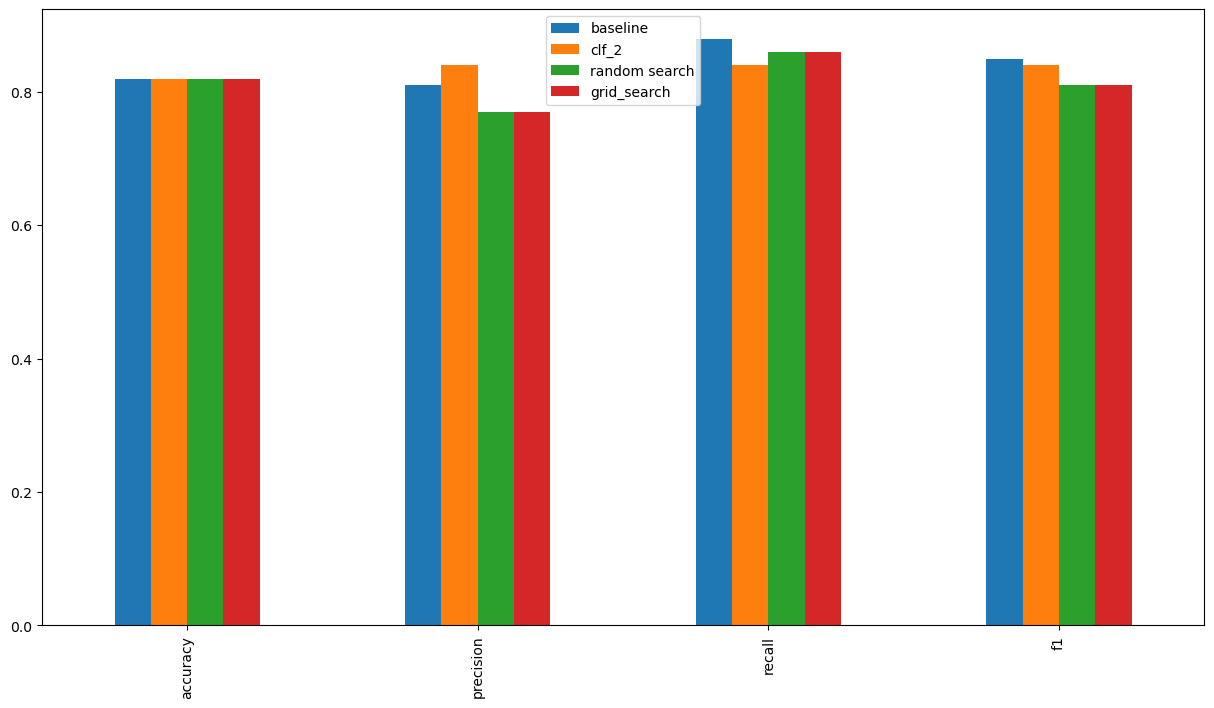

In [66]:
compare_metrics = pd.DataFrame({"baseline" : baseline_metrics,
                              "clf_2":clf_2_metrics,
                              "random search": rs_metrics,
                              "grid_search": gs_metrics})
compare_metrics.plot.bar(figsize = (15,8))

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:

1. With Python's `pickle` module
2. With the `joblib` module

In [67]:
import pickle

# Save an exisitng model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl","wb"))

In [68]:
# Load a savrd model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl","rb"))

In [69]:
# Make some predcitions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

compare

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81

**Joblib**

In [70]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [71]:
# Import a saved joblib model

loaded_job_model = load(filename="gs_random_forest_model_1.joblib")

In [72]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

## 7. Putting it all together!

In [78]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [79]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [80]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
    
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [86]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup eandom seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset="Price", inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make","Colour"]
categorical_transformer = Pipeline (steps = [
    ("imputer", SimpleImputer(strategy='constant', fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

doors_feature = ["Doors"]
door_transformer = Pipeline(steps =[
    ("imputer", SimpleImputer(strategy='constant', fill_value=4)),
])

numeric_features = ["Odometer (KM)"]
numeric_transformers = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='mean'))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers = [
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, doors_feature),
                        ("num", numeric_transformers, numeric_features)
])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps = [("preprocessor", preprocessor),
                         ("model", RandomForestRegressor())])

# split data
X = data.drop("Price", axis = 1)
y = data ["Price"]
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use `GridsearchCV` or `RandomizedSearchCV` with out `Pipeline`.

In [87]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, error_score='raise', cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.4s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.5s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [88]:
gs_model.score(X_test,y_test)

0.2848784564026805